In [32]:
import lib
import pandas as pd
from matplotlib import pyplot as plt

In [33]:
# Download & extract file
if not lib.data_is_downloaded():
    lib.download_extract_baby_names()

In [34]:
from io import StringIO


dfs = []

for file_name, year, content in lib.loop_on_files():
    df = pd.read_csv(StringIO(content), names=["Name", "Gender", "Count", "Year"])
    df["Year"] = year
    dfs.append(df)
    
len(dfs)

142

In [35]:
df = pd.concat(dfs)
df

,Name,Gender,Count,Year
0,Emily,F,25957,2000
1,Hannah,F,23085,2000
2,Madison,F,19968,2000
3,Ashley,F,17997,2000
4,Sarah,F,17708,2000
...,...,...,...,...
32068,Zyheem,M,5,2019
32069,Zykel,M,5,2019
32070,Zyking,M,5,2019
32071,Zyn,M,5,2019


In [36]:
births_by_year = df.groupby(["Year"]).sum(numeric_only=True)
births_by_year.sort_index()

,Count
Year,
1880,201484
1881,192690
1882,221533
1883,216944
1884,243461
...,...
2017,3570234
2018,3508655
2019,3461444


<Axes: title={'center': 'total number of births for each year'}, xlabel='Year', ylabel='Births'>

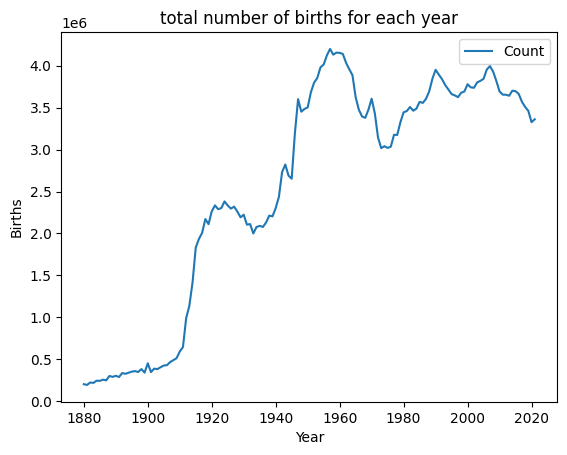

In [65]:
births_by_year.plot(title="total number of births for each year", ylabel="Births")

In [38]:
# My name is Bahy so it doesn't exist in any record. I'll choose the name of the bot I am creating.
brians = df[df["Name"] == "Brian"]
brians.set_index("Year", inplace=True)
brians.sort_index()

,Name,Gender,Count
Year,,,
1909,Brian,M,5
1911,Brian,M,7
1912,Brian,M,6
1913,Brian,M,14
1914,Brian,M,11
...,...,...,...
2017,Brian,M,1777
2018,Brian,M,1626
2019,Brian,M,1471


In [39]:
brian_years = brians.groupby("Year").sum(numeric_only=True)
brian_years

,Count
Year,
1909,5
1911,7
1912,6
1913,14
1914,11
...,...
2017,1777
2018,1626
2019,1471


In [40]:
all_years = births_by_year.index

all_years.difference(brian_years.index)

Index(['1880', '1881', '1882', '1883', '1884', '1885', '1886', '1887', '1888',
       '1889', '1890', '1891', '1892', '1893', '1894', '1895', '1896', '1897',
       '1898', '1899', '1900', '1901', '1902', '1903', '1904', '1905', '1906',
       '1907', '1908', '1910'],
      dtype='object', name='Year')

In [41]:
empty_values = all_years.difference(brian_years.index).to_frame(name="Count")
empty_values["Count"]  = 0
empty_values.head()

,Count
Year,
1880,0
1881,0
1882,0
1883,0
1884,0


<Axes: title={'center': 'Brians by Year'}, xlabel='Year', ylabel='Births'>

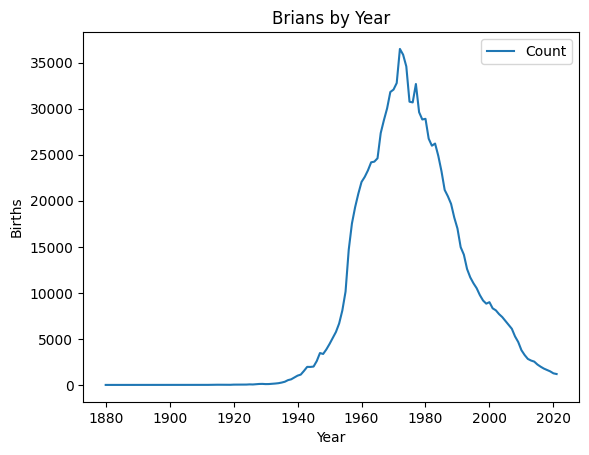

In [62]:
pd.concat([brian_years, empty_values]).sort_index().plot(title="Brians by Year", ylabel="Births")

In [43]:
def apply_to_group(x):
    group = x.groupby("Year").sum(numeric_only=True)

    empty_values = all_years.difference(group.index).to_frame(name="Count")
    empty_values["Count"] = 0

    group_with_empty_values = pd.concat([group, empty_values])
    group_with_total = pd.concat([group_with_empty_values,
                                  births_by_year.rename(columns={'Count': 'Total'})], axis='columns')

    group_with_total["Percentage"] = (
        group_with_total["Count"] / group_with_total["Total"]) * 100
    return group_with_total.sort_index()


names_to_plot = ['Barack', 'Madonna', 'Frida', 'Hale', 'Khaleesi', 'Tyrion']
filt = (df["Name"].isin(names_to_plot))
name_groups = df.loc[filt].groupby("Name").apply(apply_to_group)
name_groups


Count    Total  Percentage
Name   Year                            
Barack 1880      0   201484    0.000000
       1881      0   192690    0.000000
       1882      0   221533    0.000000
       1883      0   216944    0.000000
       1884      0   243461    0.000000
...            ...      ...         ...
Tyrion 2017     55  3570234    0.001541
       2018     58  3508655    0.001653
       2019     57  3461444    0.001647
       2020     32  3327419    0.000962
       2021     35  3361375    0.001041

[852 rows x 3 columns]

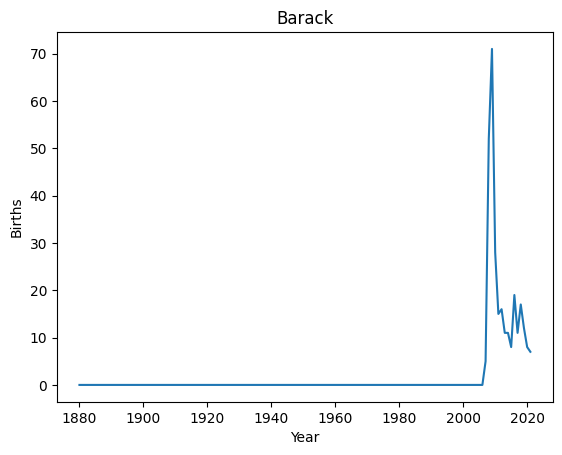

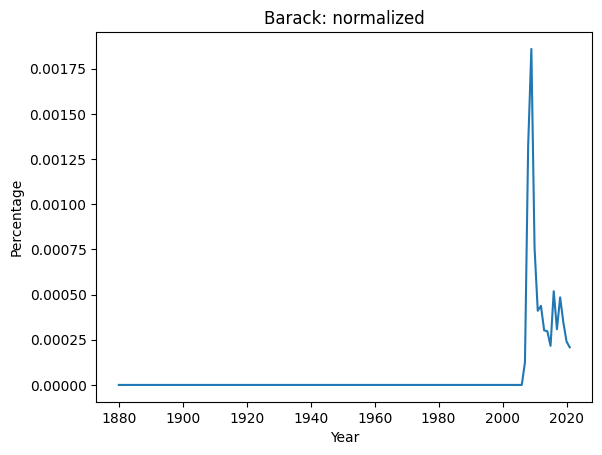

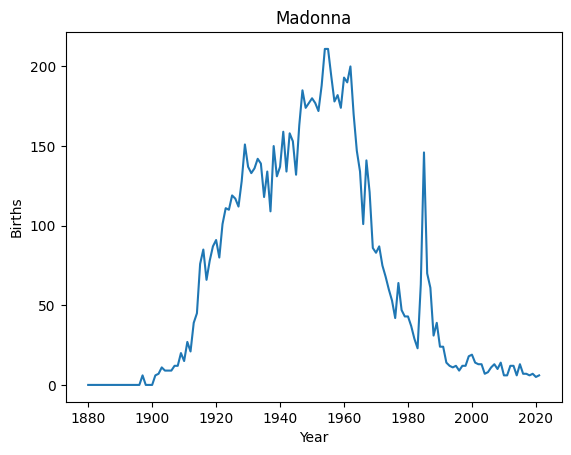

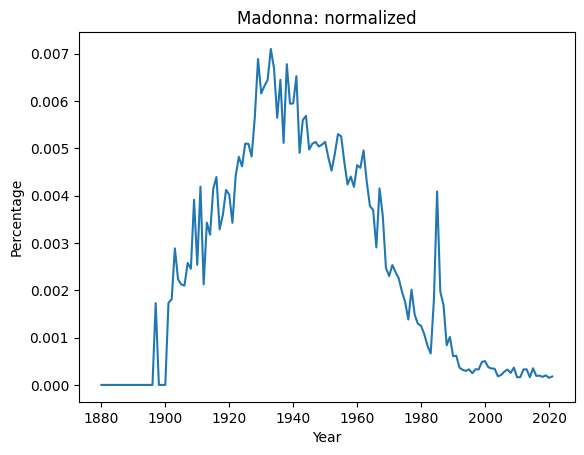

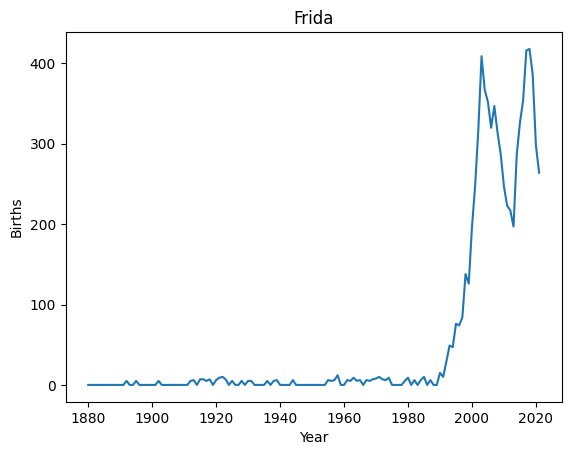

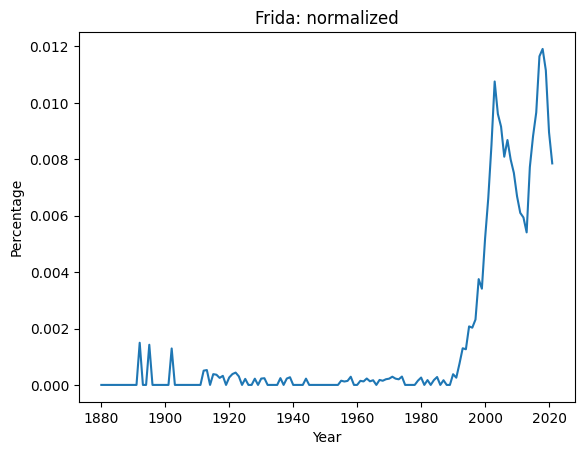

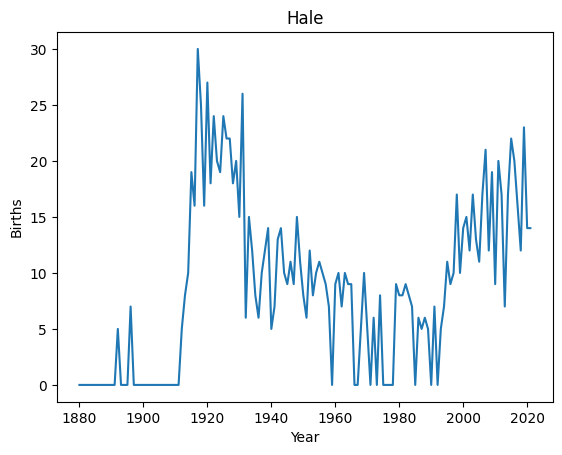

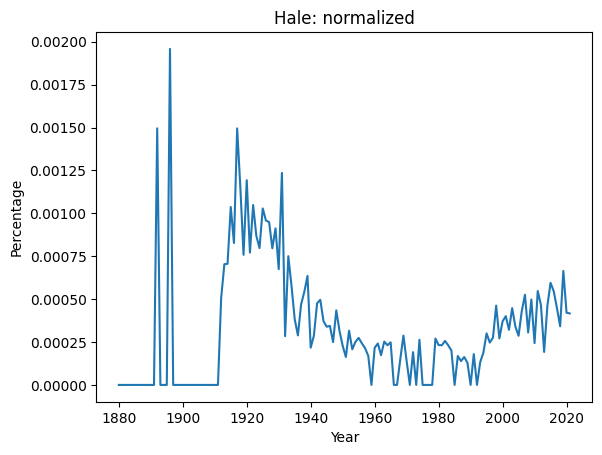

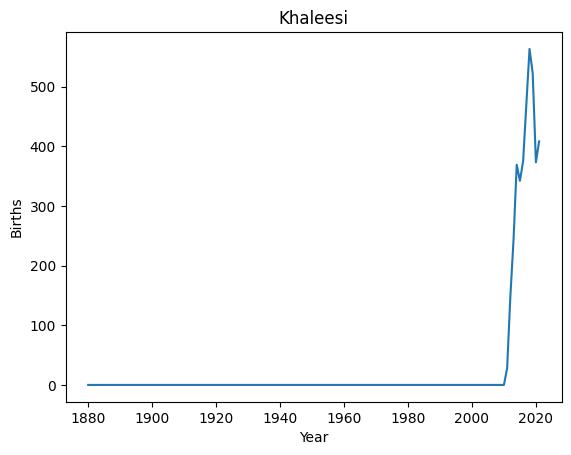

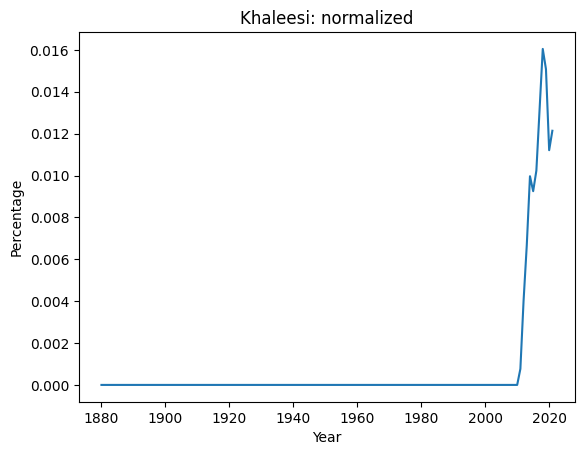

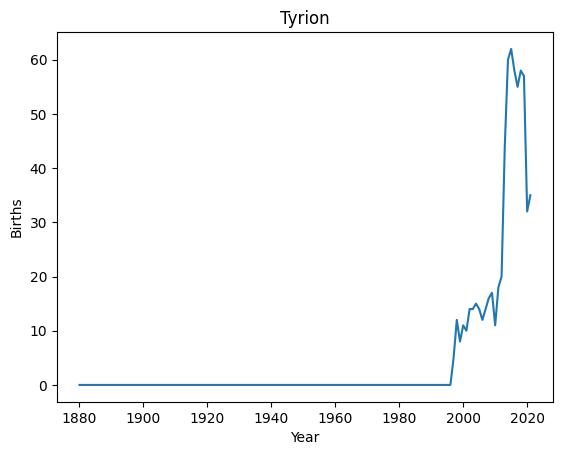

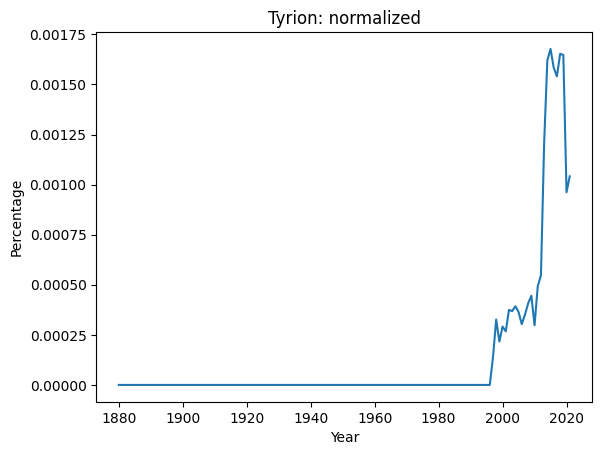

In [64]:

for name in names_to_plot:
    name_groups.loc[name, 'Count'].plot(title=name, ylabel="Births")
    plt.show()
    name_groups.loc[name, 'Percentage'].plot(title=name + ": normalized", ylabel="Percentage")
    plt.show()


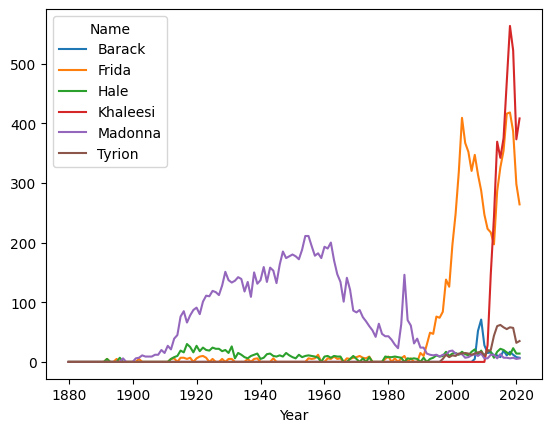

In [54]:
count_pivot = name_groups.pivot_table(
    index="Year", columns='Name', values='Count')
count_pivot.plot()
plt.show()


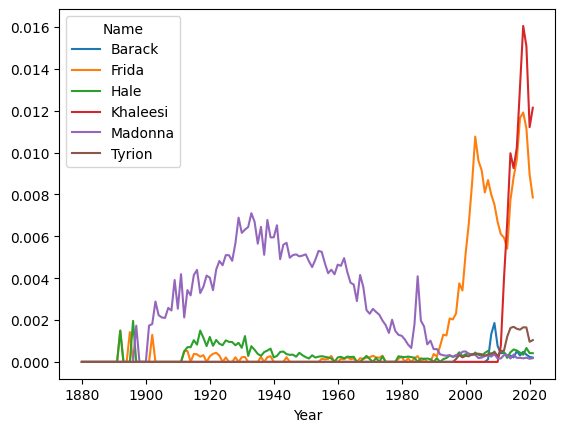

In [55]:
perc_pivot = name_groups.pivot_table(index="Year", columns='Name', values='Percentage')
perc_pivot.plot()
plt.show()

In [58]:
count_pivot.describe()

Name,Barack,Frida,Hale,Khaleesi,Madonna,Tyrion
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,2.049296,54.394366,8.739437,27.028169,67.169014,4.732394
std,8.325239,114.137155,7.541544,102.643357,66.558029,13.167721
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000
50%,0.000000,5.000000,8.000000,0.000000,40.500000,0.000000
75%,0.000000,9.750000,14.000000,0.000000,131.750000,0.000000
max,71.000000,418.000000,30.000000,563.000000,211.000000,62.000000


In [59]:
perc_pivot.describe()

Name,Barack,Frida,Hale,Khaleesi,Madonna,Tyrion
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,0.000055,0.001520,0.000332,0.000764,0.002499,0.000130
std,0.000219,0.003085,0.000358,0.002915,0.002222,0.000366
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000320,0.000000
50%,0.000000,0.000146,0.000249,0.000000,0.002112,0.000000
75%,0.000000,0.000424,0.000464,0.000000,0.004574,0.000000
max,0.001860,0.011913,0.001958,0.016046,0.007102,0.001677
